<a href="https://colab.research.google.com/github/gabcmartins/scripts_projeto_doc/blob/main/Graphs_laske.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

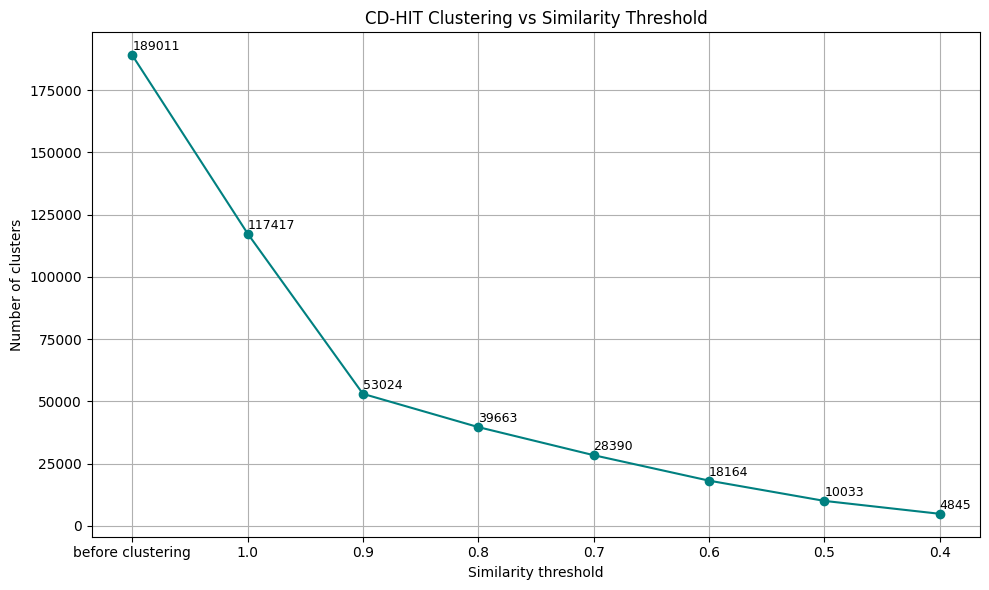

In [ ]:
x = ['before clustering', '1.0', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4']
y = [189011,117417,53024,39663,28390,18164,10033,4845]  # substitua com seus valores reais

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='teal')
for i in range(len(x)):
    plt.text(x[i], y[i] + 800, str(y[i]), ha='left', va= 'bottom', fontsize=9)
plt.xlabel('Similarity threshold')
plt.ylabel('Number of clusters')
plt.title('CD-HIT Clustering vs Similarity Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Carregar o arquivo TSV (ajuste o caminho se necessário)
df = pd.read_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_estatisticas_laske_median.tsv', sep="\t")

# Criar a coluna 'Familia' extraindo o prefixo GHx
df["Familia"] = df["Proteina"].str.extract(r"^(GH\d+)")

# Remover o prefixo GHx. da coluna 'Proteina'
df["Proteina"] = df["Proteina"].str.replace(r"^GH\d+\.", "", regex=True)

# Calcular o log2FoldChange
df["log2FoldChange"] = np.log2(df["median_azlmr"] / df["median_ctrl"])

# Salvar o novo arquivo (opcional)
df.to_csv("/content/drive/MyDrive/Doutorado/Laske/dados_volcano_plot_median.tsv", sep="\t", index=False)


In [ ]:
volcano_plot= pd.read_csv("/content/drive/MyDrive/Doutorado/Laske/dados_volcano_plot_median.tsv", sep="\t")


In [ ]:
volcano_plot.head(87)

,Proteina,n_alzmr,n_ctrl,median_azlmr,median_ctrl,p_valor,Familia,log2FoldChange
0,ATL90129.1,47,55,5.343832,3.714747,0.001078,GH3,0.524611
1,QNM01487.1,54,66,4.988143,3.077772,0.001509,GH3,0.696617
2,QUH30605.1,20,29,3.858661,2.201378,0.001921,GH3,0.809693
3,BBL03117.1,30,44,2.128816,3.022695,0.002014,GH2,-0.505784
4,CBL35301.1,40,47,7.373714,3.982414,0.002200,GH2,0.888748
...,...,...,...,...,...,...,...,...
82,ALJ44202.1,23,33,4.011165,2.582019,0.047492,GH2,0.635522
83,AII65177.1,29,44,3.507839,6.460282,0.049162,GH2,-0.881015
84,BEU16867.1,45,57,5.580414,3.619552,0.049856,GH2,0.624561
85,QIB53421.1,28,33,2.101692,1.609060,0.049868,GH31,0.385333


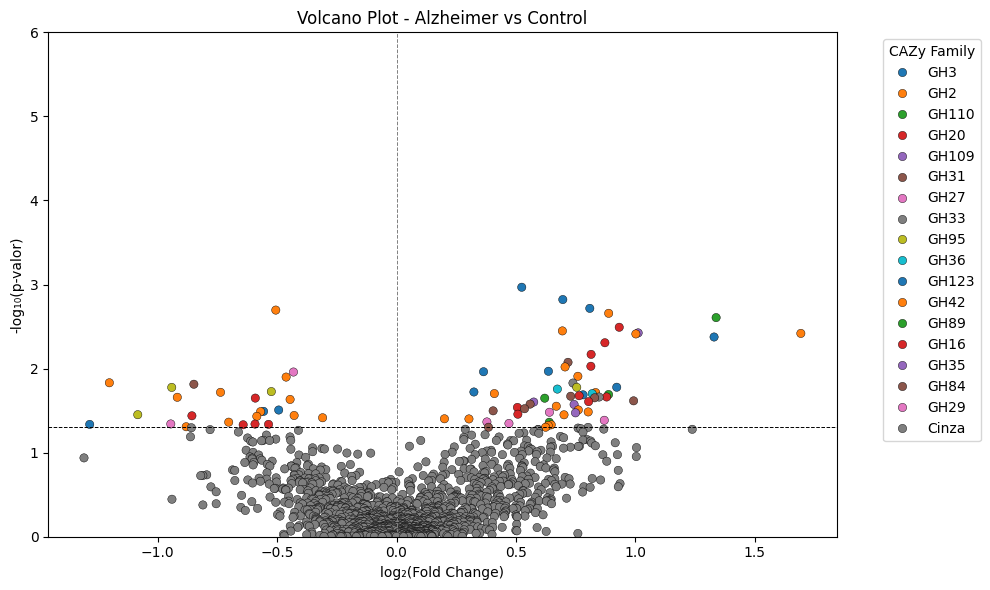

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o TSV
df = pd.read_csv("/content/drive/MyDrive/Doutorado/Laske/dados_volcano_plot_median.tsv", sep="\t")

# Calcular -log10(p_valor)
df['log10_pvalor'] = -np.log10(df['p_valor'])

# Classificar os pontos: cinza para p_valor <= 0.05, família para os outros
df['cor'] = df.apply(lambda row: 'Cinza' if row['p_valor'] >= 0.05 else row['Familia'], axis=1)

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='log2FoldChange',
    y='log10_pvalor',
    hue='cor',
    palette='tab10',  # você pode mudar o estilo de cores aqui
    edgecolor='black',
    linewidth=0.3
)

# Linhas de referência
plt.axhline(-np.log10(0.05), linestyle='--', color='black', linewidth=0.7)
plt.axvline(0, linestyle='--', color='grey', linewidth=0.7)
plt.ylim (0,6)
plt.xlabel('log₂(Fold Change)')
plt.ylabel('-log₁₀(p-valor)')
plt.title('Volcano Plot - Alzheimer vs Control')
plt.legend(title='CAZy Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Doutorado/Laske/volcano_plot.png')
plt.show()


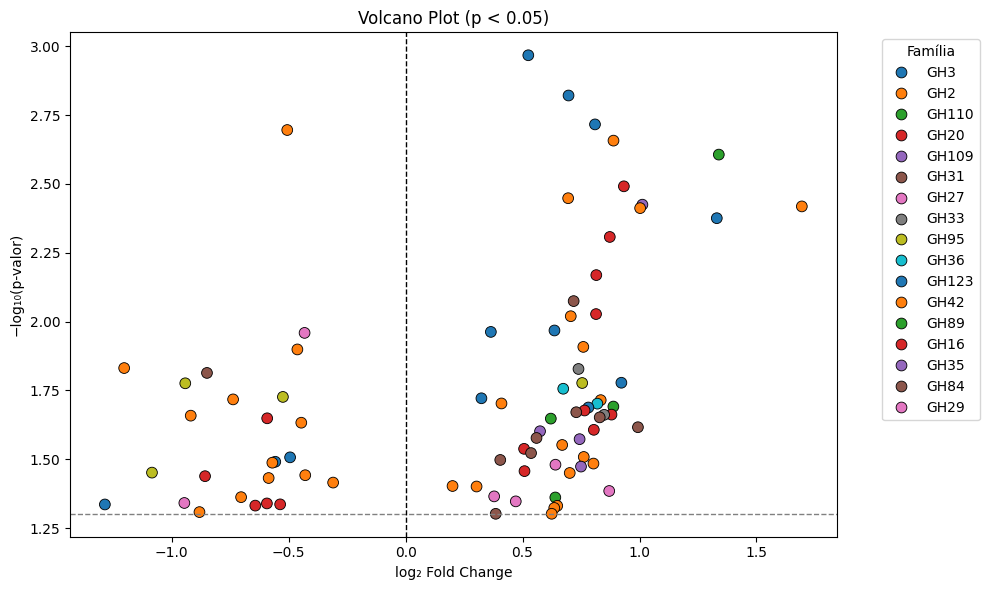

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o TSV
df = pd.read_csv("/content/drive/MyDrive/Doutorado/Laske/dados_volcano_plot_median.tsv", sep="\t")

# Filtrar apenas p-valor < 0.05
df_ns = df[df["p_valor"] < 0.05].copy()

# Calcular -log10(p_valor)
df_ns["neg_log10_p"] = -np.log10(df_ns["p_valor"])

# Paleta de cores por família
familias = df_ns["Familia"].unique()
cores = sns.color_palette("hls", len(familias))
mapa_cores = dict(zip(familias, cores))

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_ns,
    x="log2FoldChange",
    y="neg_log10_p",
    hue="Familia",
    palette='tab10',
    edgecolor="black",
    s=60
)

plt.axhline(-np.log10(0.05), color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("log₂ Fold Change")
plt.ylabel("−log₁₀(p-valor)")
plt.title("Volcano Plot (p  0.05)")
plt.legend(title="Família", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Carregar os dados (ajuste se for CSV ou outro formato)
df = pd.read_csv("/content/drive/MyDrive/Doutorado/Laske/dados_volcano_plot_median.tsv", sep="\t")  # substitua pelo nome real

# Filtrar apenas os significativos
df_sig = df[df['p_valor'] < 0.05].copy()

# Classificar em up ou down
df_sig['Differencial abundance'] = df_sig['log2FoldChange'].apply(lambda x: 'Increased abundance' if x > 0 else 'Decreased abundance')

# Todas as famílias presentes
familias = df_sig['Familia'].dropna().unique()

# Lista para armazenar os resultados
resultados = []

# Fazer o teste para cada família
for fam in familias:
    # CDS da família
    df_fam = df_sig[df_sig['Familia'] == fam]
    up_fam = (df_fam['Differencial abundance'] == 'Increased abundance').sum()
    down_fam = (df_fam['Differencial abundance'] == 'Decreased abundance').sum()

    # CDS de outras famílias
    df_outros = df_sig[df_sig['Familia'] != fam]
    up_outros = (df_outros['Differencial abundance'] == 'Increased abundance').sum()
    down_outros = (df_outros['Differencial abundance'] == 'Decreased abundance').sum()

    # Tabela de contingência
    tabela = [[up_fam, down_fam],
              [up_outros, down_outros]]

    # Teste de Fisher
    _, p_valor_fisher = fisher_exact(tabela)

    resultados.append({
        'Familia': fam,
        'Increased abundanc': up_fam,
        'Decreased abundance': down_fam,
        'Up_outros': up_outros,
        'Down_outros': down_outros,
        'p_valor_fisher': p_valor_fisher
    })

# Converter em DataFrame
df_resultados = pd.DataFrame(resultados)

# Visualizar os resultados
print(df_resultados.sort_values('p_valor_fisher'))


   Familia  Increased abundanc  Decreased abundance  Up_outros  Down_outros  \
8     GH95                   1                    3         59           23   
1      GH2                  16                   12         44           14   
5     GH31                   7                    1         53           25   
10   GH123                   1                    1         59           25   
0      GH3                   8                    2         52           24   
3     GH20                   7                    4         53           22   
2    GH110                   2                    0         58           26   
4    GH109                   2                    0         58           26   
7     GH33                   2                    0         58           26   
6     GH27                   2                    1         58           25   
9     GH36                   2                    0         58           26   
11    GH42                   1                    0 

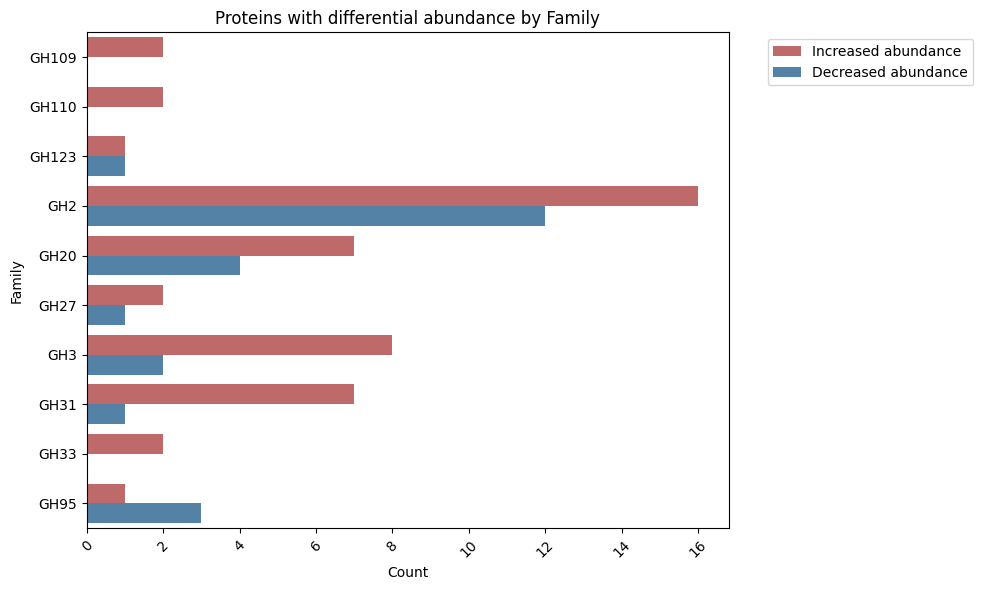

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas algumas famílias (ex: as 10 com menor p-valor)
top_familias = df_resultados.nsmallest(10, 'p_valor_fisher')['Familia']

# Filtra os CDS significativos dessas famílias
df_plot = df_sig[df_sig['Familia'].isin(top_familias)]

# Conta up/down por família
df_counts = df_plot.groupby(['Familia', 'Differencial abundance']).size().reset_index(name='count')
cores = {'Increased abundance': 'indianred', 'Decreased abundance': 'steelblue'}

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_counts, x='count', y='Familia', hue='Differencial abundance', palette=cores)
plt.xticks(rotation=45)
plt.title('Proteins with differential abundance by Family')
plt.xlabel('Count')
plt.ylabel('Family')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=None)
plt.tight_layout()
plt.show()
